# Propuesta Desarrollada

La propuesta a desarrollar se enfoca en encontrar el mejor modelo de segmentación de datos, considerando la evaluación de varios algoritmos de aprendizaje automático. El objetivo principal es identificar la metodología más eficaz para dividir un conjunto de datos en grupos más pequeños y homogéneos, lo que permitirá una personalización más precisa de las estrategias de marketing y la toma de decisiones.
![Descripción de la imagen](./diagrama.png)




# Metodología propuesta:

**Preparación de datos:** Antes de aplicar cualquier modelo, se realizará una exhaustiva preparación de los datos, que incluirá limpieza, normalización y selección de características relevantes.

**División de datos:** El conjunto de datos se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización de cada modelo.

**Entrenamiento de modelos:** Se entrenarán todos los modelos mencionados anteriormente en el conjunto de entrenamiento.

**Evaluación de modelos:** Se utilizarán métricas de evaluación adecuadas para cada tipo de modelo (por ejemplo, precisión, F1-score, error cuadrático medio, etc.) en el conjunto de prueba para comparar el rendimiento de cada modelo.

**Ajuste de hiperparámetros:** Se ajustarán los hiperparámetros de los modelos para optimizar su rendimiento.

**Selección del mejor modelo:** Se seleccionará el modelo que demuestre el mejor rendimiento en términos de métricas de evaluación específicas y se validará su capacidad de segmentación en un conjunto de datos independiente si es posible.

**Implementación en producción:** Una vez seleccionado el mejor modelo, se implementará en la producción para llevar a cabo la segmentación de clientes de manera efectiva.

**Evaluación continua:** Se realizará un seguimiento continuo del modelo en producción para garantizar su eficacia a lo largo del tiempo y se considerarán ajustes si es necesario.

En resumen, esta propuesta busca encontrar el modelo de segmentación más efectivo a través de una evaluación exhaustiva de varios algoritmos de aprendizaje de máquina. La elección del modelo adecuado será fundamental para optimizar la personalización de las estrategias de marketing y mejorar la toma de decisiones empresariales.


# Colección y Preparación de datos

Los datos se obtienen a partir de una consulta que se raliza directamente en la base de datos. Para poder evaluar la segmentación, los Clientes deben cumplir los siguientes requerimientos:
 - Haber realizado ventas en los últimos dos años.
 - Que la colocación total sea mayor o igual que $100,000 COP.

La empresa cuenta con 465.111 Clientes que cumplen con los requerimientos mencionados anteriormente. A continuación se muestra las
distribuciones de datos de estos Clientes.



In [19]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Andres\\Downloads\\MachingLerningUN\\MachingLerningUN\\jbook_ml202330\\docs\\Data.csv', sep=";")
df.head()


,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario
0,20888.0,ATLANTICO,BARRANQUILLA,9/03/1928,97,Masculino,6,70,2,204000
1,25220.0,ATLANTICO,BARRANQUILLA,23/04/1953,72,Masculino,5,92,1,1443498
2,31903.0,CESAR,VALLEDUPAR,18/05/1927,98,Femenino,6,97,1,1555569
3,35796.0,ATLANTICO,BARRANQUILLA,9/02/1928,97,Masculino,6,82,2,251999
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000


Se describe un DataFrame con 10 columnas y 435.917 filas. Las columnas contienen datos de diferentes tipos, principalmente int64 (números enteros), columnas de tipo objeto (posiblemente texto u otros datos no numéricos) y float64(números decimales).

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435917 entries, 0 to 435916
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Identificacion    435917 non-null  float64
 1   Departamento      435917 non-null  object 
 2   Localidad         435917 non-null  object 
 3   Fecha_Nacimiento  435917 non-null  object 
 4   Edad              435917 non-null  int64  
 5   Genero            435917 non-null  object 
 6   Estrato           435917 non-null  int64  
 7   Recency           435917 non-null  int64  
 8   Frequency         435917 non-null  int64  
 9   Monetario         435917 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 33.3+ MB


Se agrega la descripción estadística de los datos, donde se relaciona la cantidad de registros, la media, desv. estándar, míninmos, máximos y percentiles. Se puede evidenciar por ejemplo la edad promedio es de 56 años, la Recencia promedio es de 38.8, frecuencia promedio de 2.4 y el monto promedio de compra es de 4.369M. Podemos análizar el monto máximo (7.558M) y mínimo (1.001M) de compra. El estrato mínimo es 1 y máximo es 6, la frecuencia mínima de compra (1) y máxima de 55 y recencia mínima de 0 y máxima de 103.

In [21]:
df.drop(columns=["Identificacion"]).describe()

,Edad,Estrato,Recency,Frequency,Monetario
count,435917.000000,435917.000000,435917.000000,435917.000000,4.359170e+05
mean,56.664324,1.760909,37.576263,2.474648,4.530464e+06
std,14.819077,0.962235,28.577203,2.193684,3.541307e+06
min,19.000000,1.000000,0.000000,1.000000,1.001510e+05
25%,46.000000,1.000000,12.000000,1.000000,1.877092e+06
50%,57.000000,1.000000,31.000000,2.000000,3.613657e+06
75%,67.000000,2.000000,57.000000,3.000000,6.267180e+06
max,124.000000,6.000000,103.000000,55.000000,7.558485e+07


Validamos la cantidad de registros únicos en cada columna del DataFrame.

In [22]:
df.nunique()

Identificacion      435916
Departamento             3
Localidad              263
Fecha_Nacimiento     27406
Edad                    96
Genero                   2
Estrato                  6
Recency                104
Frequency               44
Monetario           272182
dtype: int64

Se verifica que el DataFrame no contenga valores nulos, en este caso, todos cumplen con el parámetro.

In [23]:
df.isnull().sum()

Identificacion      0
Departamento        0
Localidad           0
Fecha_Nacimiento    0
Edad                0
Genero              0
Estrato             0
Recency             0
Frequency           0
Monetario           0
dtype: int64

In [24]:
(df.isnull().sum()/(len(df)))*100

Identificacion      0.0
Departamento        0.0
Localidad           0.0
Fecha_Nacimiento    0.0
Edad                0.0
Genero              0.0
Estrato             0.0
Recency             0.0
Frequency           0.0
Monetario           0.0
dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_NA = df.isna().sum()

all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)
print(all_data_NA)

Series([], dtype: int64)


Se realiza un análisis de Independienca de las variables de DataFrame. La validación se realiza a través de una matriz de correlación, los valores en la matriz indican el grado de relación (correlación) entre las variables. Los valores cercanos a 1 indican una correlación positiva, las variables aumentan juntas en la misma dirección. Los valores cercanos a 0 indican que no hay correlación, las variables no están relacionadas linealmente. Y finalmente, los valos negativo cerca a -1 indican una Correlación negativa, Las variables cambian en direcciones opuestas.

En Este caso, tenemos dos variables con un grado importante de correlación: Monetario y Frequency.

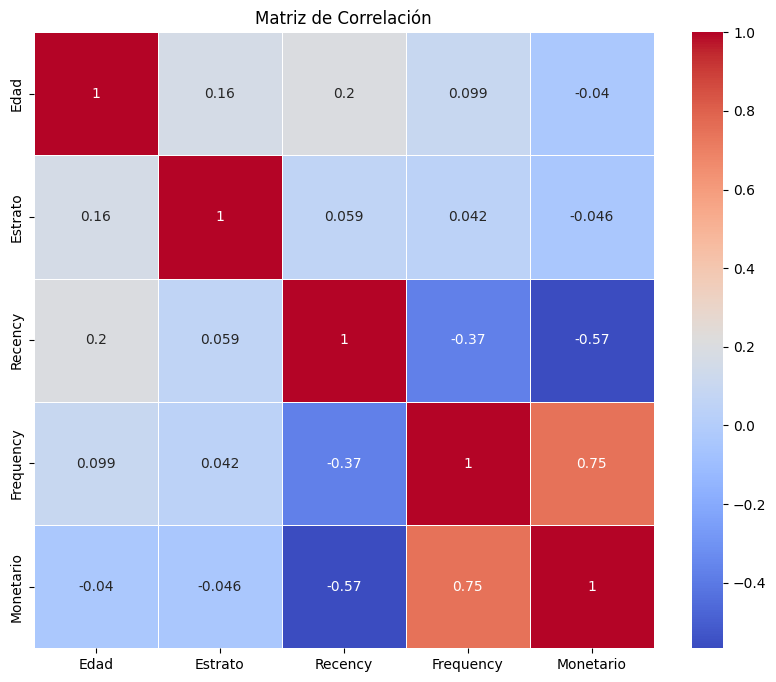

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns="Identificacion")
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Realizamos un análisis a las variables del Dataframe:
**Edad**: Se puede verificar el promedio de los usuarios que compran, teniendo un media de 56 años, podmeos observar datos atípicos como la edad máxima de 124 años.
**Estrato**: La gran mayoría de usuarios se concentra en los estratos 1 y 2.
**Recency**: Tengo una Recencia entre 0 y 103 agrupandose en 20 - 40.
**Frecuency**: Se agrupan entre 1 - 4, teniendo datos atípicos fuera de la media.
**Monetario**: Se agrupan entre 2M - 4M, teniendo datos atípicos fuera de la media.


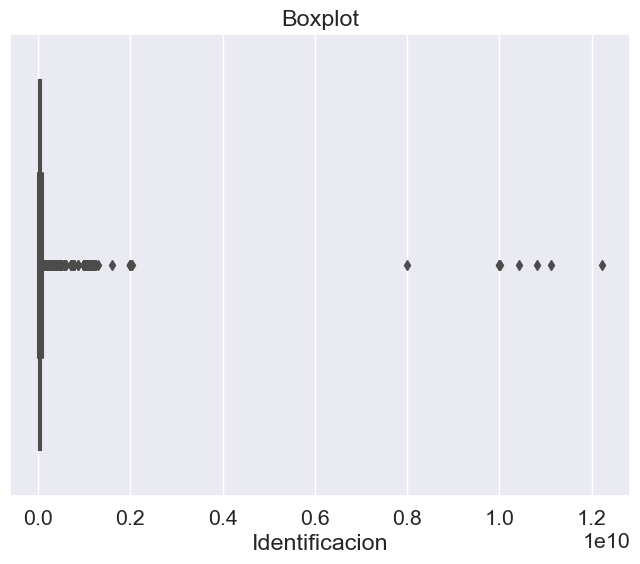

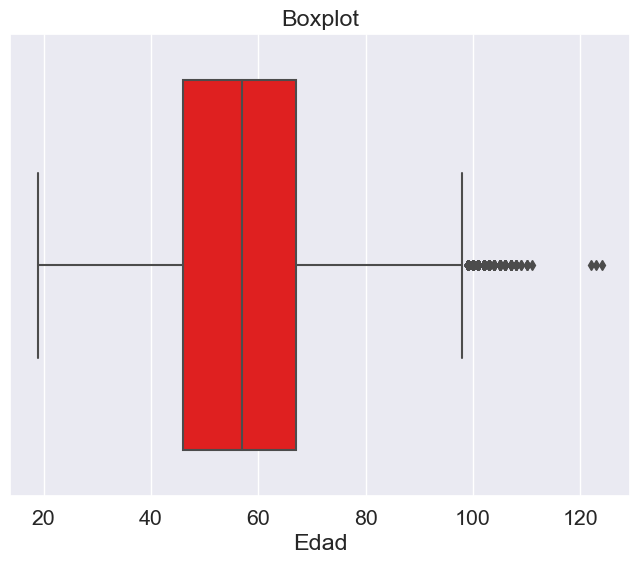

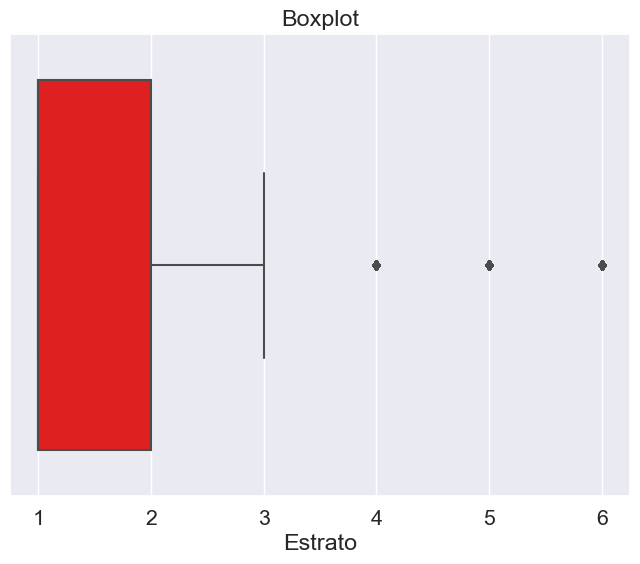

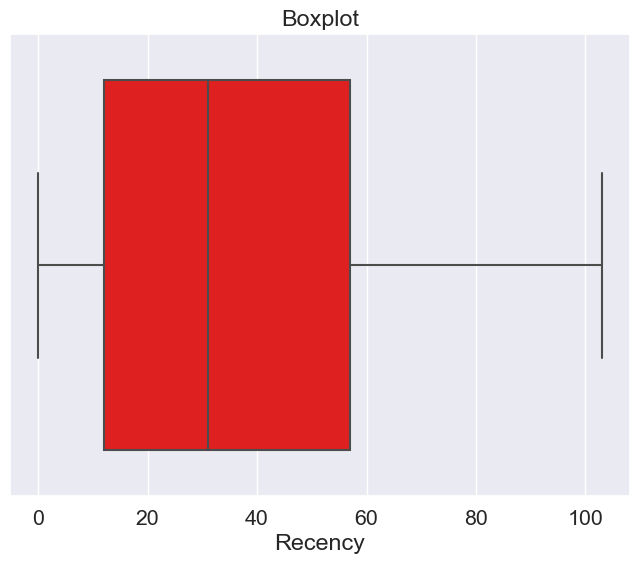

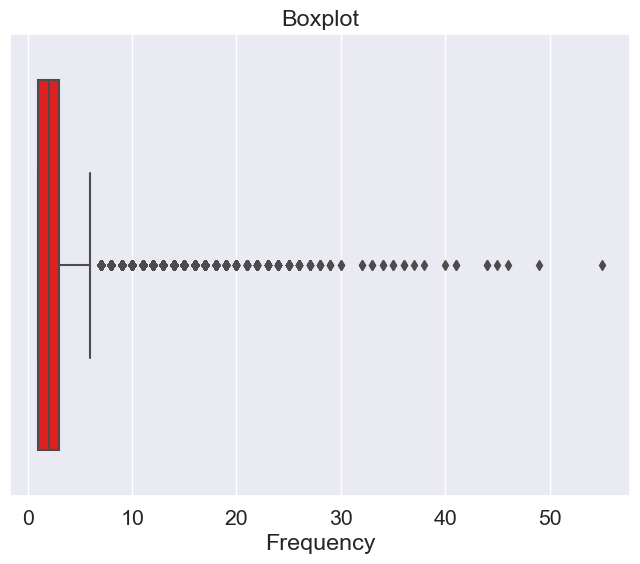

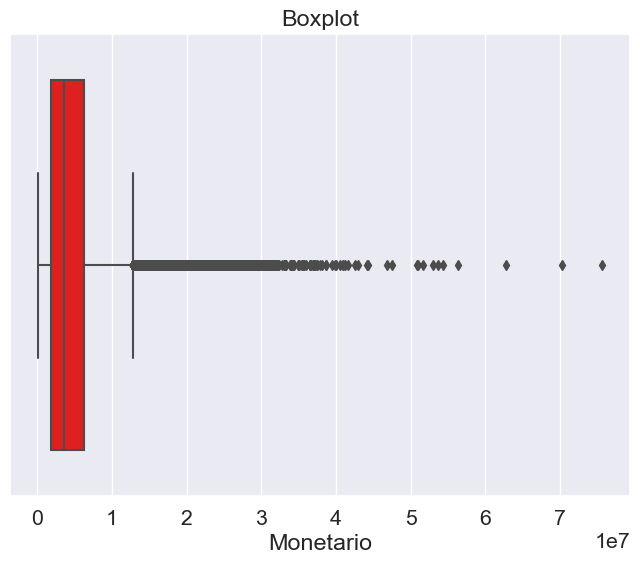

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.set(font_scale=1.4)

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='red')
    plt.title('Boxplot')  
    plt.show()

Se analiza la distribución de usuarios por Departamento, obteniendo la mayor cantidad de usuarios en Atlántico.

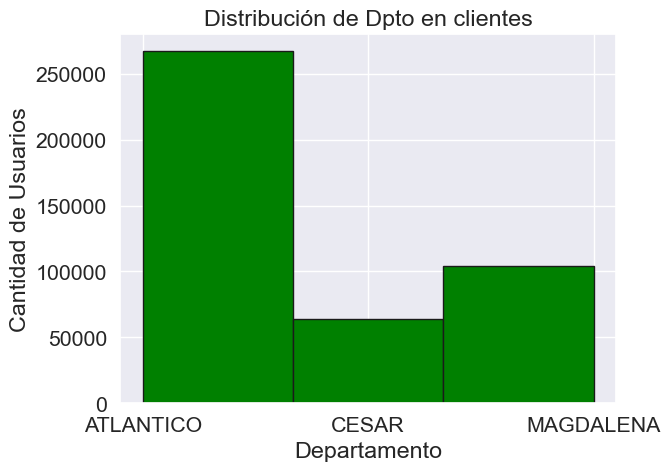

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
dfrecuencia = df['Departamento']

plt.hist(dfrecuencia, bins=3, edgecolor='k',color='green') 

plt.xlabel('Departamento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Dpto en clientes')

plt.show()


La distribución de usuarios por edad, se observa que se concentran en edades adultas entre 40 - 60 años.

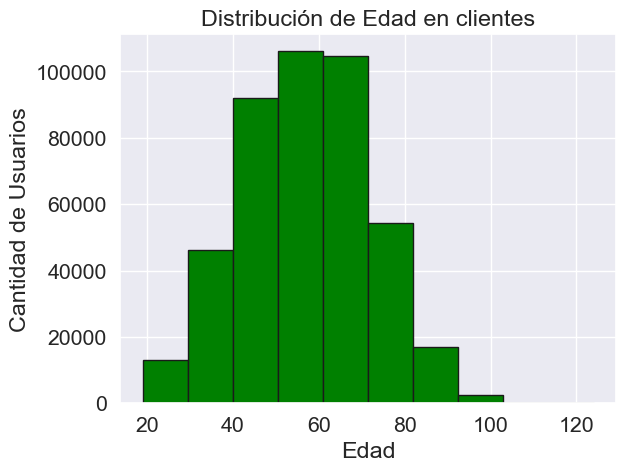

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Edad']

plt.hist(efrecuencia, bins=10, edgecolor='k', color='green') 

plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Edad en clientes')

# Mostrar el gráfico
plt.show()

La distribción por género, se identifica una concentración en el género **Femenino**

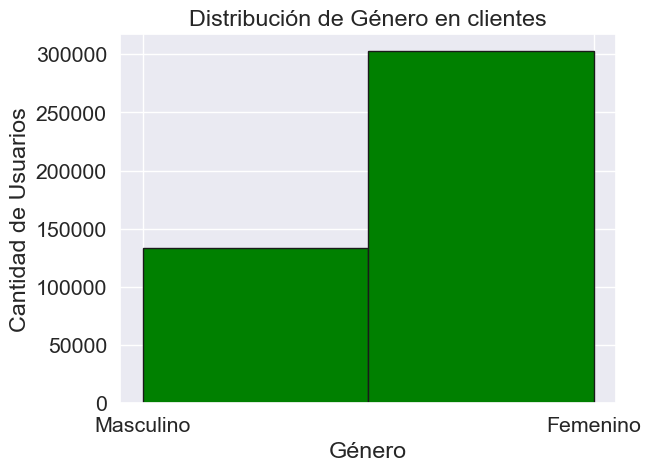

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Genero']

plt.hist(gfrecuencia, bins=2, edgecolor='k', color='green') 

plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Género en clientes')

plt.show()

Como mencionaba anteriormente, por estrato tenemos una concentración en los estratos 1 y 2.

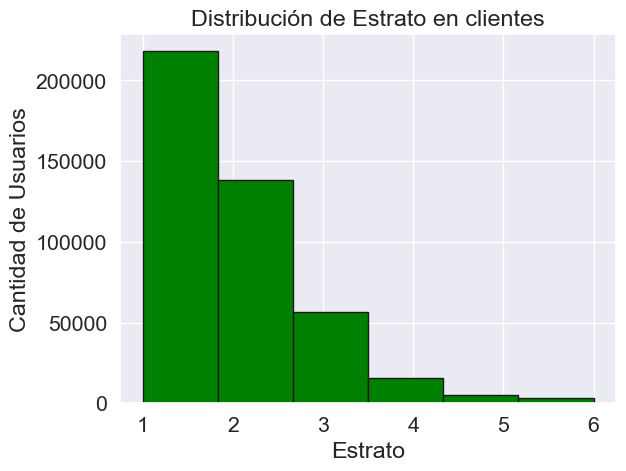

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Estrato']

plt.hist(efrecuencia, bins=6, edgecolor='k', color='green') 

plt.xlabel('Estrato')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Estrato en clientes')

plt.show()

La distribución de usuarios por Recency, tenemos una distibución asimétrica a la izquierda. Se concentra la mayor cantidad de usuarios en Recency entre 0 - 2. Se divide el grupo de datos en dos: Los que tienen menos de 48 meses activos y los que tienen más de 48 meses sin comprar que denominaremos Inactivos.

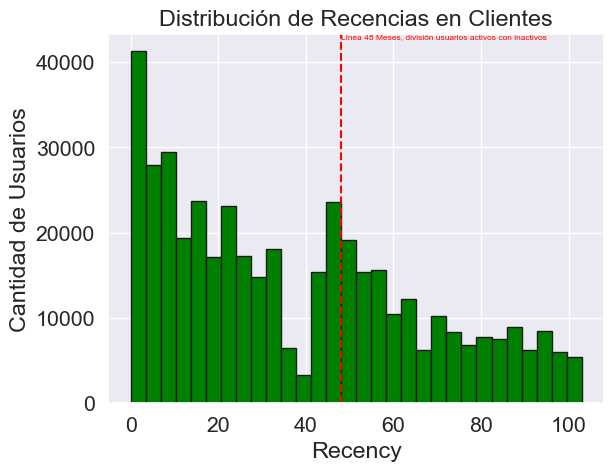

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
rfrecuencia = df['Recency']

plt.hist(rfrecuencia, bins=30, edgecolor='k', color='green')
plt.axvline(x=48, color='red', linestyle='--', label='Separador: Recency < 48') 

plt.xlabel('Recency')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Recencias en Clientes')
plt.text(48, plt.ylim()[1], 'Línea 48 Meses, división usuarios activos con inactivos', color='red', fontsize=6, va='top', ha='left')

plt.show()

Distirbución de Clientes por Frequency, tenemos una distribución asimétrica hacia la izquierda. Con datos concentrados entre 2 - 5.

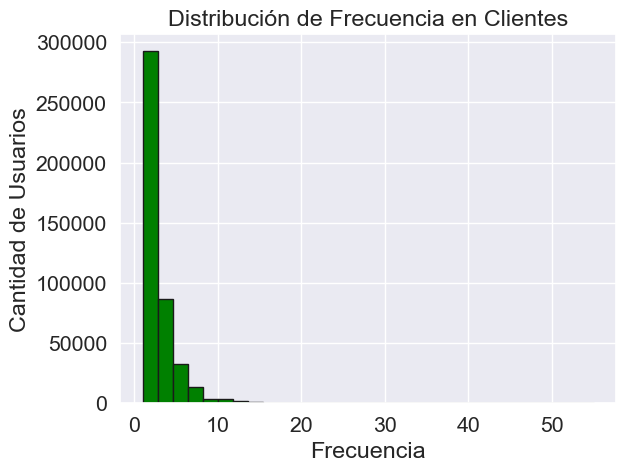

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
ffrecuencia = df['Frequency']

plt.hist(ffrecuencia, bins=30, edgecolor='k', color='green') 

plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Frecuencia en Clientes')

plt.show()

Al igual que el gráfico anterior, tenemos una distribución asimétrica hacia la izquierda.

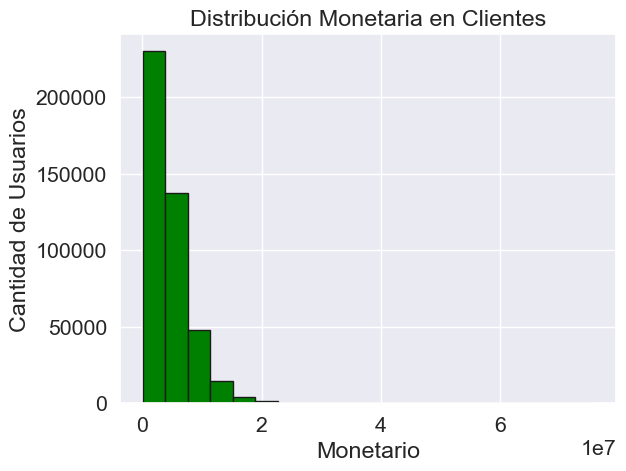

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
mfrecuencia = df['Monetario']

plt.hist(mfrecuencia, bins=20, edgecolor='k', color='green') 

plt.xlabel('Monetario')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución Monetaria en Clientes')

plt.show()

**Análisis Bivariado**
Con el análisis bivariado podemos comprender cómo se relacionan las variables entre sí y la relación entre las variables independientes presentes en el conjunto de datos  y para identificar patrones de tendencia lineal.

Gráfico de dispersión (scatter plot): La parte principal del gráfico es un conjunto de puntos dispersos en un plano cartesiano. Cada punto representa un par de valores de dos variables diferentes que estás comparando.

Línea de regresión: La línea que atraviesa los puntos en el gráfico es la línea de regresión. Esta línea se ajusta a los datos de manera que represente la mejor estimación de la relación entre las dos variables. En un gráfico de dispersión, la línea de regresión se utiliza para modelar una posible tendencia lineal en los datos.

Dirección de la línea de regresión: La dirección de la línea de regresión indica si hay una relación positiva o negativa entre las dos variables. Si la línea sube hacia la derecha, hay una correlación positiva, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar. Si la línea desciende hacia la derecha, hay una correlación negativa, lo que significa que cuando una variable aumenta, la otra tiende a disminuir.

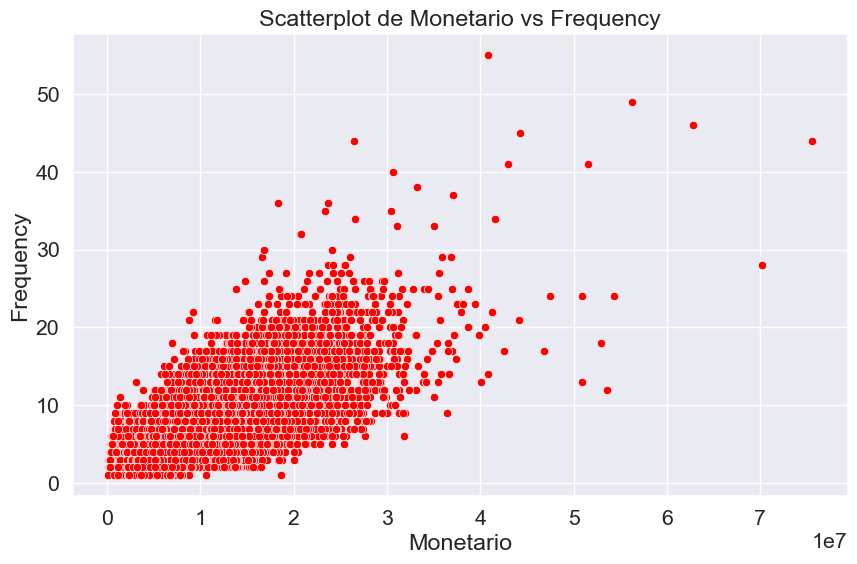

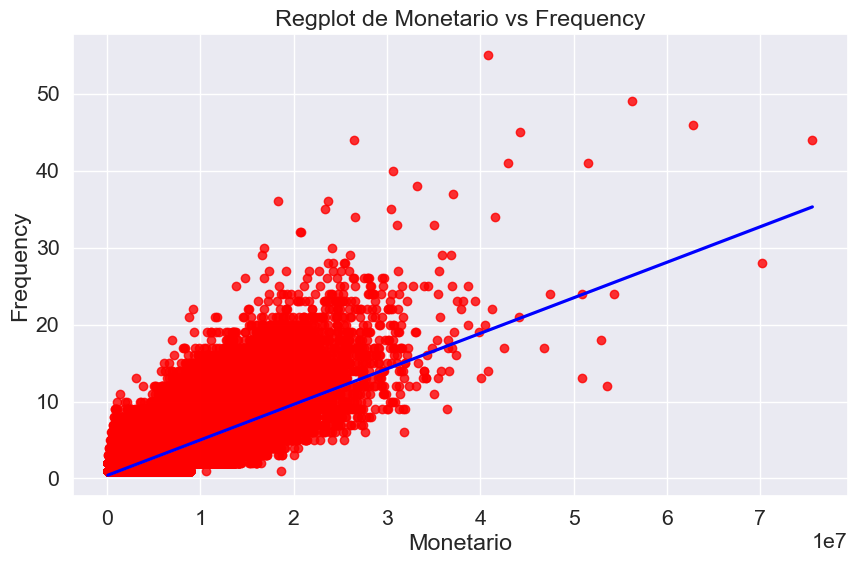

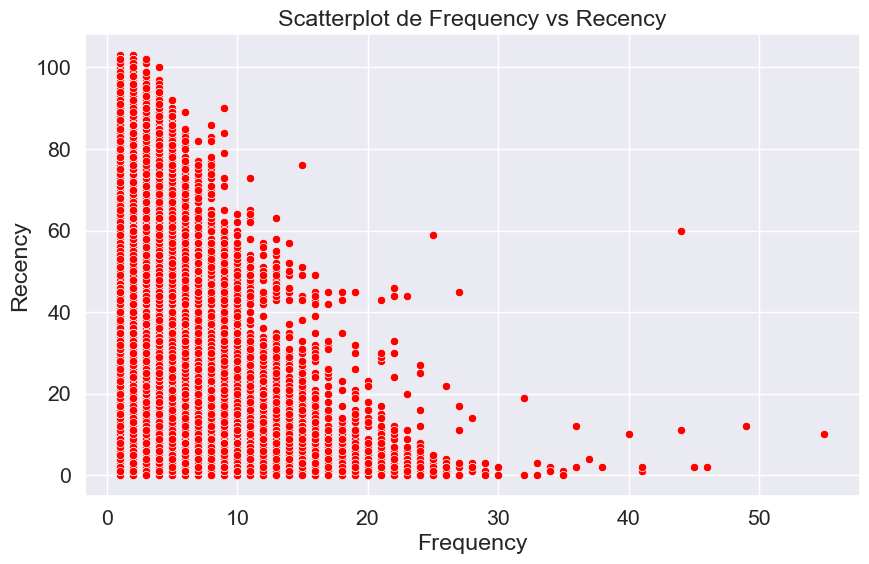

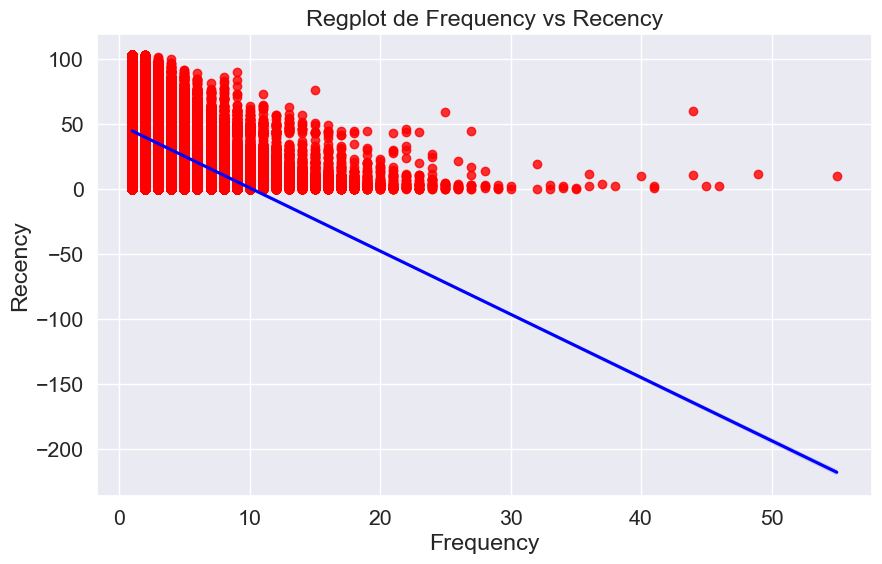

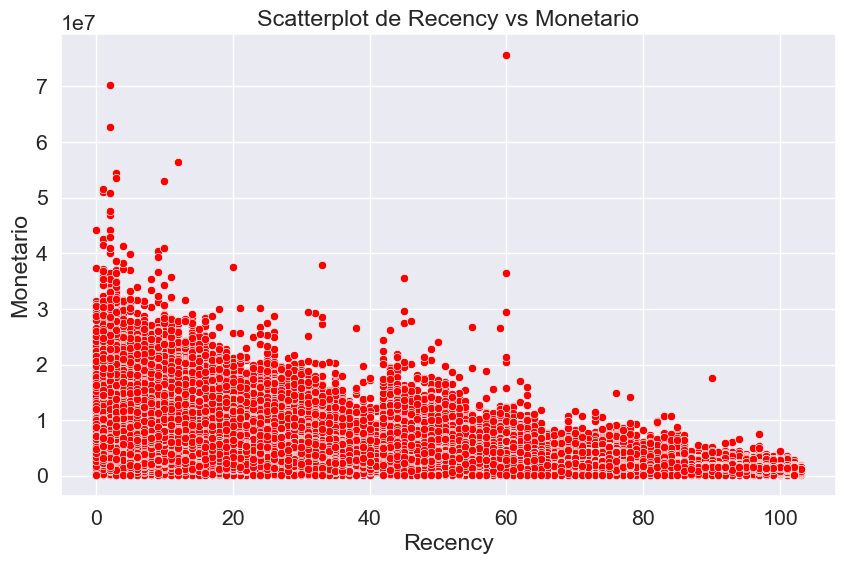

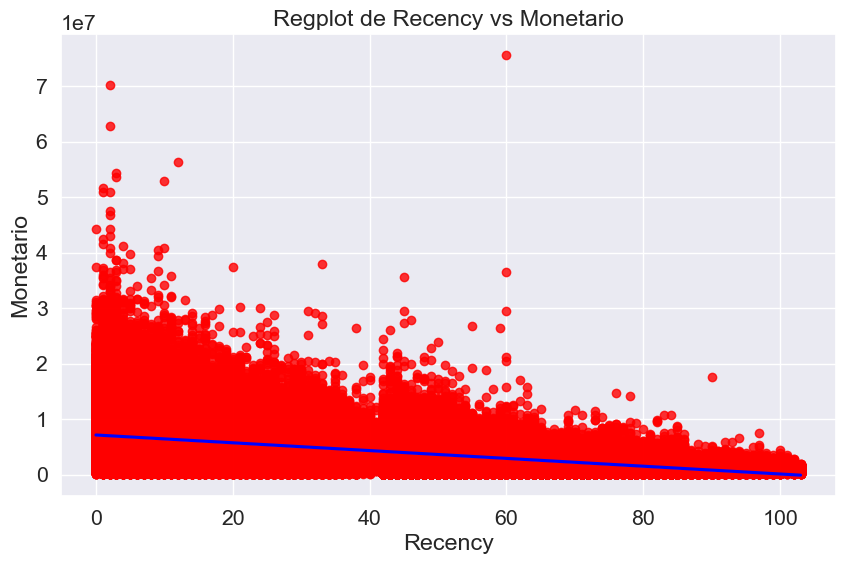

In [41]:
bivar = [('Monetario', 'Frequency'), ('Frequency','Recency'),('Recency','Monetario')]

for pair in bivar:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], color='red')
    plt.title(f'Scatterplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()
 
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=pair[0], y=pair[1], color= 'red', line_kws={"color":"blue"})
    plt.title(f'Regplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()